<a href="https://colab.research.google.com/github/elviobg/Dog-Breeds/blob/main/Dog_Breeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas padrão

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Lendo o arquivo disponibilizado no gdrive

In [15]:
rootPath = 'drive/My Drive/Colab Notebooks/Dog Breeds/'
labels = pd.read_csv(rootPath + 'dataset/labels.csv')
labels.tail()

,id,breed
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher
10221,fff43b07992508bc822f33d8ffd902ae,chesapeake_bay_retriever


# Análise exploratória

Buscando a quantidade de raças diferentes e os nomes delas

In [22]:
each_label = labels.groupby("breed").count()
each_label = each_label.rename(columns = {"id" : "count"})
each_label = each_label.sort_values("count", ascending=False)
each_label

,count
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
...,...
golden_retriever,67
brabancon_griffon,67
komondor,67


Plotando a quantidade de imagens por raça




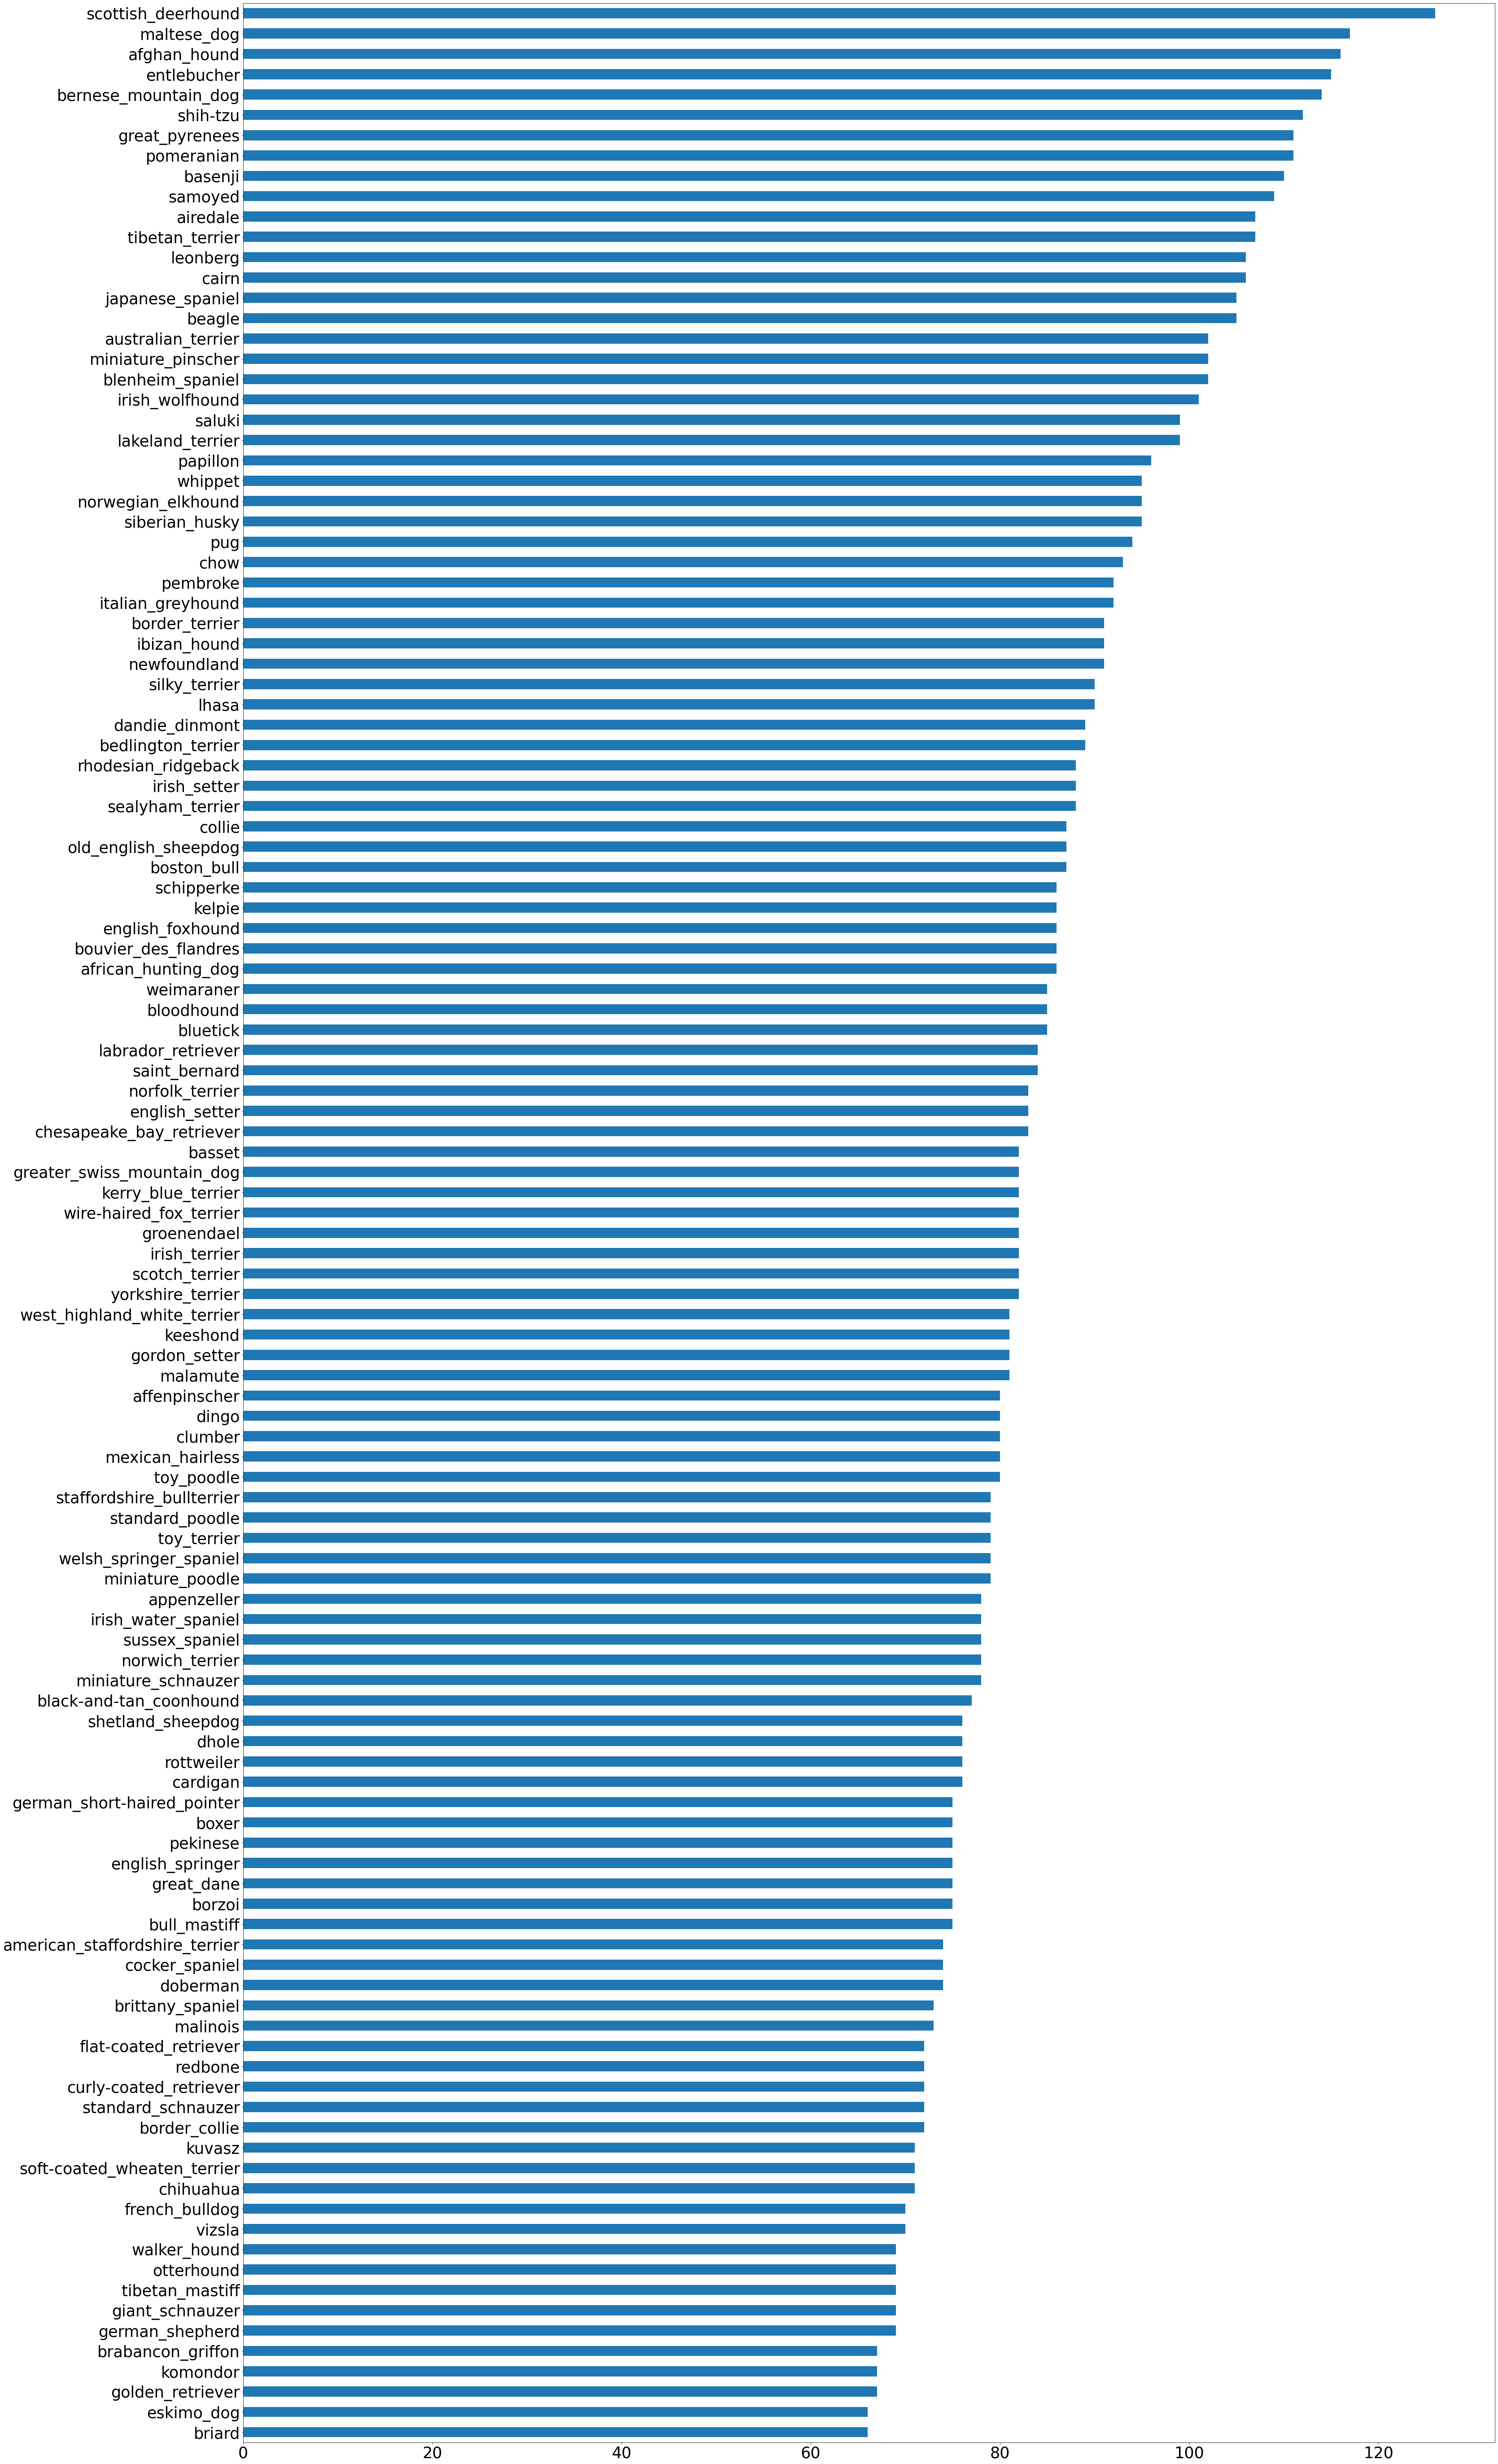

In [28]:
labels.breed.value_counts(ascending=True).plot(kind='barh', fontsize=35, figsize=(50,100))

Pegando as raças com maior amostra

In [29]:
top_breeds = sorted(list(labels['breed'].value_counts().head(16).index))
top_labels = labels[labels['breed'].isin(top_breeds)]

Plotando a quantidade de imagens das raças com maior número de imagens


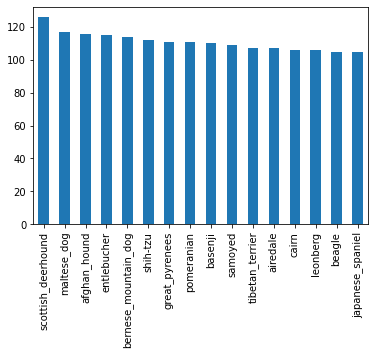

In [33]:
top_labels.breed.value_counts().plot(kind='bar')

Mostrando 20 cães aleatórios do dataset

In [46]:
from PIL import Image
from IPython.display import HTML

def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((150, 150), Image.LANCZOS)
    return i

dogs = labels.sample(20)
dogs['file'] = dogs.id.map(lambda id: f'drive/My Drive/Colab Notebooks/Dog Breeds/dataset/train/{id}.jpg')
dogs['image'] = dogs.file.map(lambda f: get_thumbnail(f))
dogs.head()

,id,breed,file,image
9925,f97b9b8848683ab240cffeda2c855502,entlebucher,drive/My Drive/Colab Notebooks/Dog Breeds/data...,<PIL.JpegImagePlugin.JpegImageFile image mode=...
9020,e278e285726d3ec4b737d80cc891d266,chow,drive/My Drive/Colab Notebooks/Dog Breeds/data...,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1030,19824021ae3bb47d0ed1069c78633c6c,dandie_dinmont,drive/My Drive/Colab Notebooks/Dog Breeds/data...,<PIL.JpegImagePlugin.JpegImageFile image mode=...
3976,62b8bd540033bff986fe0690d710feee,norfolk_terrier,drive/My Drive/Colab Notebooks/Dog Breeds/data...,<PIL.JpegImagePlugin.JpegImageFile image mode=...
9555,efb995a30e2672d00cd70273e911590f,great_pyrenees,drive/My Drive/Colab Notebooks/Dog Breeds/data...,<PIL.JpegImagePlugin.JpegImageFile image mode=...


,breed,image
9925,entlebucher,
9020,chow,
1030,dandie_dinmont,
3976,norfolk_terrier,
9555,great_pyrenees,
8128,labrador_retriever,
7227,scotch_terrier,
446,collie,
2339,miniature_poodle,
1509,blenheim_spaniel,

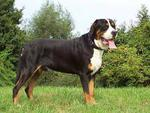
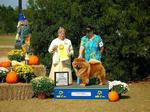
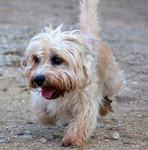
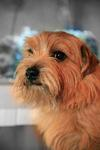
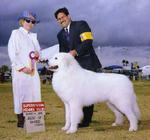
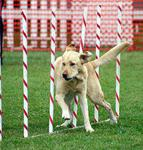
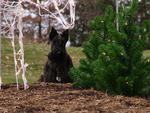
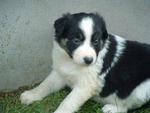
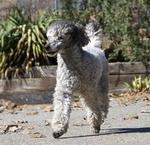
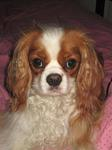
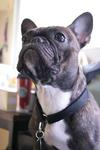
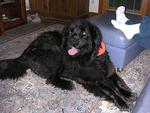
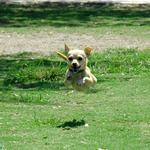
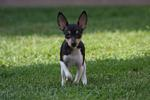
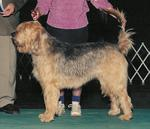
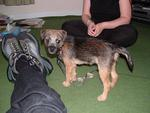
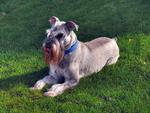
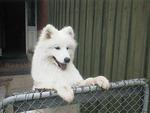
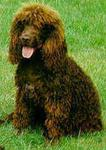
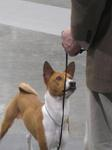

In [47]:
from IPython.display import HTML
from io import BytesIO
import base64

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

HTML(dogs[['breed', 'image']].to_html(formatters={'image': image_formatter}, escape=False))